## Keras: A high level neural network library

In this exercise we will revisit classification using simple neural networks. To do so we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Installing Keras

Detailed installation instructions can be found at https://keras.io/#installation

Installation is a two step process:
1. Install a deep learning backend (Tensorflow recommended)

``` pip install tensorflow ```
2. Install Keras

``` pip install Keras ```


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

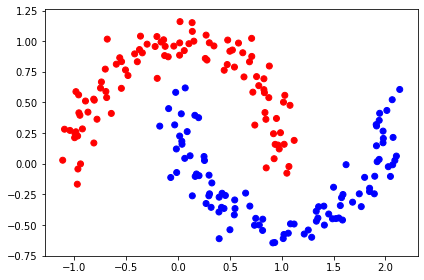

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import lenses_dataset, get_colors


X, y = lenses_dataset()

# For consistent color plotting:

cmap=get_colors(y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.tight_layout()
plt.show()

Let's split it into a training and testing set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit. 

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [4]:
# Relevant imports
from tensorflow.keras.models import Sequential
# Keras refers to an architecture in which the outputs of 
# one layer are the inputs to the next as "Sequential"
from tensorflow.keras.layers import Dense
# Everything we've talked about in class so far is referred to in 
# Keras as a "dense" connection between layers, where every input 
# unit connects to a unit in the next layer
from tensorflow.keras.optimizers import SGD
# SGD is the learning algorithm we will use

# Exercise 1:

In [5]:

#Let's first create neural network with 1 layer 
# To add a layer to the architecture, you would simply use .add(LAYER).
# Each "input_dim" of each layer should be the number units in the previous layer 
# (in this case the input), and the number of "units" should be the number of 
# outputs of the layer (in this case it will be 1).


#Write your code here: (2 lines)
perceptron = Sequential()
perceptron.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))


Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the error function as "binary_crossentropy". 

In [6]:
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)


In [7]:
#Now we train the built perceptron
#Write your code here: (1 line)
perceptron.fit(X_train, y_train, batch_size = 32, epochs = 10, verbose = 1)


Train on 160 samples
Epoch 1/10
160/160 [==============================] - 4s 27ms/sample - loss: 0.4217
Epoch 2/10
160/160 [==============================] - 0s 451us/sample - loss: 0.4213
Epoch 3/10
160/160 [==============================] - 0s 451us/sample - loss: 0.4208
Epoch 4/10
160/160 [==============================] - 0s 476us/sample - loss: 0.4202
Epoch 5/10
160/160 [==============================] - 0s 451us/sample - loss: 0.4194
Epoch 6/10
160/160 [==============================] - 0s 701us/sample - loss: 0.4186
Epoch 7/10
160/160 [==============================] - 0s 401us/sample - loss: 0.4178
Epoch 8/10
160/160 [==============================] - 0s 601us/sample - loss: 0.4171
Epoch 9/10
160/160 [==============================] - 0s 375us/sample - loss: 0.4163
Epoch 10/10
160/160 [==============================] - 0s 476us/sample - loss: 0.4156


In [8]:
from utils import get_accuracy

In [9]:
# And test it on training and test set 
get_accuracy(perceptron, X_test, y_test)

0.825

Text(12.375, 0.5, 'Test')

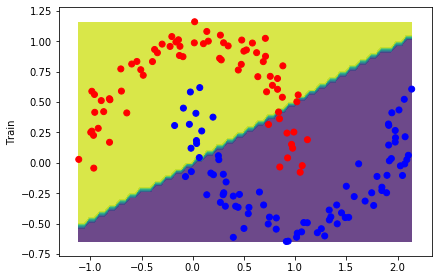

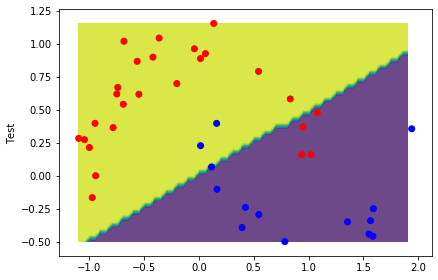

In [10]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For the first exercise, use Keras to create a 2 layer neural network by completing build_one_output_model() in exercise_3.py. Recall that our input is 2-D and output has 2 possible classes, so the neural network will have an input layer of 2. Hence, we will then add one hidden layer and an output layer of 1 (corresponding to our classes- sometimes referred to as a "readout" layer). 

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [11]:

def build_one_output_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    # Add a input hidden layer with appropriate input dimension
    # 1+ lines
    model.add(Dense(2**10, input_shape=(2,), activation = 'relu'))
   

    # Add a final output layer with 1 unit 
    # 1 line
    model.add(Dense(1, activation='sigmoid'))
    
    ######################

    sgd = SGD(lr=0.001, decay=1e-7, momentum=0.9)  #Stochastic gradient descent
    model.compile(loss="binary_crossentropy", optimizer=sgd)
    return model

In [12]:
# from exercise_3 import build_one_output_model
model = build_one_output_model()

In [13]:
model.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=0)
get_accuracy(model, X_test, y_test)

0.975

Text(12.375, 0.5, 'Test')

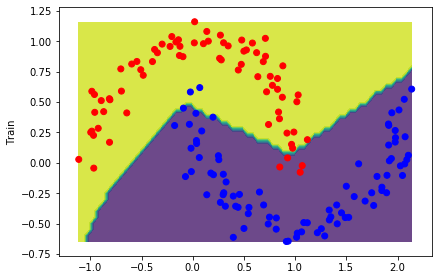

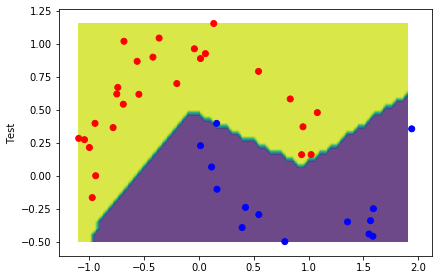

In [14]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


It is actually quite rare for a neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is your number of outputs. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding". It is easy to convert between labels (i.e. [1,2,3]) to their one-hot encoded counterparts:

In [15]:
# Before we can fit the network, we have to one-hot vectorize our response.
# Fortunately, there is a keras method for that.
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [16]:
y_train_vectorized[:, 1]

array([1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0.], dtype=float32)

In [17]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]


The one hot encoded vectors will serve as future labels for our models. 

# Exercise 3: 

Implement build_classification_model() in exercise_3.py that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2. 


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

The optimizer and loss function have been filled in for you.

In [18]:
# from exercise_3 import build_classification_model


def build_classification_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    # First add a fully-connected (Dense) hidden layer with appropriate input dimension
    model.add(Dense(10, input_shape=(2,), activation = 'relu'))

    # Now our second hidden layer 
    model.add(Dense(5, input_shape=(10,), activation = 'relu'))
    

    # Finally, add a readout layer
    model.add(Dense(2, activation = 'softmax'))    

    ######################

    sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd, metrics=["accuracy"])
    return model

In [19]:
model = build_classification_model()

Use the below calls to test your implementation

In [ ]:
model.fit(X_train, y_train_vectorized, epochs=1000, batch_size=10, verbose = 1)

Train on 160 samples
Epoch 1/1000
160/160 [==============================] - 7s 41ms/sample - loss: 0.6822 - accuracy: 0.6313
Epoch 2/1000
160/160 [==============================] - 1s 3ms/sample - loss: 0.6767 - accuracy: 0.6313
Epoch 3/1000
160/160 [==============================] - 1s 5ms/sample - loss: 0.6702 - accuracy: 0.6062
Epoch 4/1000
160/160 [==============================] - 0s 2ms/sample - loss: 0.6643 - accuracy: 0.5813
Epoch 5/1000
160/160 [==============================] - 1s 4ms/sample - loss: 0.6590 - accuracy: 0.5938
Epoch 6/1000
160/160 [==============================] - 0s 3ms/sample - loss: 0.6542 - accuracy: 0.5938
Epoch 7/1000
160/160 [==============================] - 1s 4ms/sample - loss: 0.6495 - accuracy: 0.6187
Epoch 8/1000
160/160 [==============================] - 0s 3ms/sample - loss: 0.6451 - accuracy: 0.6375
Epoch 9/1000
160/160 [==============================] - 0s 3ms/sample - loss: 0.6404 - accuracy: 0.6625
Epoch 10/1000
160/160 [===================

160/160 [==============================] - 0s 1ms/sample - loss: 0.2805 - accuracy: 0.8813
Epoch 78/1000
160/160 [==============================] - 0s 1ms/sample - loss: 0.2809 - accuracy: 0.8875
Epoch 79/1000
160/160 [==============================] - 0s 2ms/sample - loss: 0.2783 - accuracy: 0.8813
Epoch 80/1000
160/160 [==============================] - 0s 1ms/sample - loss: 0.2776 - accuracy: 0.8813
Epoch 81/1000
160/160 [==============================] - 0s 1ms/sample - loss: 0.2776 - accuracy: 0.8813
Epoch 82/1000
160/160 [==============================] - 0s 3ms/sample - loss: 0.2778 - accuracy: 0.88130s - loss: 0.2118 - accura
Epoch 83/1000
160/160 [==============================] - 0s 3ms/sample - loss: 0.2761 - accuracy: 0.8813
Epoch 84/1000
160/160 [==============================] - 0s 2ms/sample - loss: 0.2740 - accuracy: 0.8750
Epoch 85/1000
160/160 [==============================] - 0s 2ms/sample - loss: 0.2730 - accuracy: 0.8813
Epoch 86/1000
160/160 [====================

160/160 [==============================] - 0s 1ms/sample - loss: 0.2412 - accuracy: 0.8813
Epoch 153/1000
160/160 [==============================] - 0s 1ms/sample - loss: 0.2409 - accuracy: 0.8875
Epoch 154/1000
160/160 [==============================] - 0s 1ms/sample - loss: 0.2401 - accuracy: 0.8875
Epoch 155/1000
160/160 [==============================] - 0s 1ms/sample - loss: 0.2404 - accuracy: 0.8875
Epoch 156/1000
160/160 [==============================] - 0s 1ms/sample - loss: 0.2404 - accuracy: 0.8875
Epoch 157/1000
160/160 [==============================] - 0s 1ms/sample - loss: 0.2419 - accuracy: 0.8813
Epoch 158/1000
160/160 [==============================] - 0s 1ms/sample - loss: 0.2412 - accuracy: 0.8813
Epoch 159/1000
160/160 [==============================] - 0s 1ms/sample - loss: 0.2388 - accuracy: 0.8875
Epoch 160/1000
160/160 [==============================] - 0s 1ms/sample - loss: 0.2381 - accuracy: 0.8875
Epoch 161/1000
160/160 [==============================] - 0s 

In [ ]:
get_accuracy(model, X_test, y_test)

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

# Exercise 4:

Now let's revisit the classification problem in Homework2. Build a neural network to predict the output in the banking marketing dataset. The architecture choice is up to you, but you are required to  use Dense layers only.
features_ex2.xlsx contains the features. It has 4521 records. First 3165 observations are used for training dataset, next 678 observations are used for cross validation dataset and final 678 observations are used for test dataset.

label_ex2.xlsx contains the label: "yes" or "no". First 3165 observations are used for training dataset, next 678 observations are used for cross validation dataset. Labels for test dataset are not provided to you because in a real world scenario you will not know the true values for your test set.

You can try different number of layers, different number of units in layers and experiment with hyperparameters. 

To include regularization, you can include a dropout layer after a hidden layer. In dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please build your model in the build_final_model() function in exercise_3.py and use the below functions to train/test your code. 

In [ ]:
from exercise_3 import build_final_model

In [ ]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE 
from typing import List
import seaborn as sns
from sklearn.utils import shuffle

class PreProcessor:
    """
    Preprocessing utility class which is going to be used for
    updating all the categorical datasets and it splits the data
    into train, cv and test datasets.
    """
    def __init__(self, df: pd.DataFrame, columns: List, target: pd.DataFrame):
        """
        Instantiate the object's attributes.
        """
        # Base conditions
        if df.empty or target.empty or len(target) != len(df) - 678:
            raise Exception("Incorrect parameters")
        self.df = df.copy(deep=True)
        self.columns = columns[:]
        self.target = target.copy(deep=True)
        # Split data attributes
        self.X_train, self.y_train = {}, {}
        self.X_cv, self.y_cv = {}, {}
        self.X_test = {}
        # Continuous variables
        self.continuous_variables_columns = df.select_dtypes(exclude=['object']).columns[:]
        self.plot_data_distribution(target)

    def plot_data_distribution(self, target: pd.DataFrame, at="y"):
        """
        Shows the distribution of the data
        """
        if not target.empty:
            sns.countplot(x=at, data=target)
        
    def transform_data(self):
        """
        This function allows us to understand how we need to handle the columns which
        are categorical and which are not. After applying the necessary transformations,
        using to_categorical for testing data and pd.get_dummies, it is able to pass the values back.
        """
        temp_df = self.df[self.columns].copy()
        # All categorical data
        categorical_df = temp_df.select_dtypes(include=['object'])
        # All numeric data
        temp_df = temp_df.select_dtypes(exclude=['object'])

        if (not(categorical_df.empty)):
            encode_df = pd.DataFrame()
            for col in categorical_df:
                one_hot = pd.get_dummies(categorical_df[col], drop_first=True, prefix=col)
                encode_df = pd.concat([encode_df, one_hot], axis=1)
            else:
                self.df = pd.concat([temp_df, encode_df], axis=1)
                self.columns = self.df.columns
        else:
            self.df = temp_df
    
    def transform_test_data(self):
        """
        This function only transforms the target variable
        """
        target = pd.get_dummies(self.target, drop_first=True)
        self.target = to_categorical(target.astype('int').astype('category'))

    def transform(self):
        """
        Function to transform everything
        """
        self.transform_data()
        self.transform_test_data()
        
        
    def split_data(self, split_for_train=3165, split_for_cv=3843):
        """
        This function is going to split the data into 3 separate sets (train, cv and test)
        """
        # Training data
        self.X_train, self.y_train = self.df[:split_for_train], self.target[:split_for_train]
        # CV data
        self.X_cv, self.y_cv = self.df[split_for_train:split_for_cv], self.target[split_for_train:split_for_cv]
        # Test data
        self.X_test = self.df[split_for_cv: ]
    
    def standardize_data(self):
        """
        Standardize dataset
        """
        continuous_columns = self.continuous_variables_columns
        scaler = preprocessing.StandardScaler().fit(self.X_train[continuous_columns])
        self.X_train[continuous_columns] = scaler.transform(self.X_train[continuous_columns])
        # Scaling all other data
        self.X_cv[continuous_columns] = scaler.transform(self.X_cv[continuous_columns])
        self.X_test[continuous_columns] = scaler.transform(self.X_test[continuous_columns])
    
    def oversampling(self):
        """
        Function performs oversampling using smote. This will be used later
        """
        sm = SMOTE(random_state = 2) 
        num_of_target = len(self.target[:, 1])
        print(self.df[:num_of_target].shape, num_of_target)
        # Splice the data and preserve testing data
        spliced_df = self.df[:num_of_target]
        test_data = self.df[num_of_target:]
        X_train_res, y_train_res = sm.fit_sample(spliced_df, self.target[:, 1])
        print('oversampling leads to dataset of :', X_train_res.shape)
        # Need to shuffle the data a bit more
        _x, _y = self.shuffler(X_train_res, y_train_res, test_data.columns)

        self.plot_data_distribution(_y)
        # Need to add the testing data back to the values
        self.df = pd.concat([_x, test_data])
        print(self.df.shape)
        self.target = to_categorical(_y.astype('int').astype('category'))
        
    def shuffler(self, X, y, columns):
        """
        Need to perform shuffling
        """
        _y = pd.DataFrame({'y': y})
        _x = pd.DataFrame(X, columns = columns)
        # Merge the 2 dataframes so that we can shuffle and then split
        _df = pd.merge(_x, _y, left_index=True, right_index=True)
        # Shuffling
        _df = shuffle(_df)
        # Returning x and y
        return _df.loc[:, _df.columns != 'y'], _df[['y']]        
        
        
pd.options.mode.chained_assignment = None
# obj = PreProcessor(train_df, train_df.columns, test_df)
# obj.transform()
# obj.split_data()
# obj.standardize_data()

In [ ]:
#Read the data
train_df = pd.read_excel('features_ex2.xlsx')
test_df = pd.read_excel('label_ex2.xlsx')
#Convert categorical variables into one-hot encodings(including the output variable consisting of "yes" or "no")
obj = PreProcessor(train_df, train_df.columns, test_df)
obj.transform()

#Split data into train, validation and test set (70:15:15 ratio)
obj.split_data()

#Apply standardization to continuous values
obj.standardize_data()

In [ ]:
# Also creating a balanced obj to test how our model would perform when we synthesis and make our dataset more balanced
balanced_obj = PreProcessor(train_df, train_df.columns, test_df)
balanced_obj.transform()
balanced_obj.oversampling()
balanced_obj.split_data(5241, 5241+1021)
balanced_obj.standardize_data()

In [ ]:
from tensorflow.keras.layers import Dropout
def build_final_model(allow_dropout = False):
    model = Sequential()
    ### YOUR CODE HERE ###

    model.add(Dense(2**10, input_shape=(41,), activation = 'relu'))

    if allow_dropout:
        # To avoid overfitting
        model.add(Dropout(0.5))

    model.add(Dense(2**8, input_shape=(2**10,), activation = 'tanh'))

    if allow_dropout:
        # To avoid overfitting
        model.add(Dropout(0.5))

    model.add(Dense(2**4, input_shape=(2**8,), activation = 'relu'))

    
    if allow_dropout:
        # To avoid overfitting
        model.add(Dropout(0.5))

    
    model.add(Dense(2, activation = 'softmax'))  
   
    ######################
    sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])
    # we'll have the categorical crossentropy as the loss function
    # we also want the model to automatically calculate accuracy

    return model

In [ ]:
model = build_final_model()
model_with_dropout = build_final_model(True)

In [ ]:
#fit the model
#obtain predictions on validation set and compute accuracy,precision,recall and plot ROC curve with AOC

In [ ]:
# With unbalanced data
model.fit(obj.X_train, obj.y_train, epochs=100, batch_size=10, verbose = 1)
# model_with_dropout(obj.X_train, obj.y_train, epochs=100, batch_size=10, verbose = 1)

In [ ]:
# import seaborn as sns
# from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, roc_curve, auc

# def get_scores(model, x, y, use_predict = False):
#     if use_predict:
#         y_pred = model.predict(x)
#     else:
#         y_pred = model.predict_classes(x)
#     return {'accuracy score': accuracy_score(y, y_pred),
#             'precision score': precision_score(y, y_pred),
#             'recall score' : recall_score(y, y_pred)}


# def plot_confusion_matrix(y_cv, y_pred):
#     """
#     Plot confusion matrix
#     """
#     cm = confusion_matrix(y_cv, y_pred) #confusion matrix

#     ax= plt.subplot()
#     sns.heatmap(cm, annot=True, ax = ax,fmt='g')  #heatmap, fmt='g' converts scientific to float
#     ax.set_xlabel('Predicted labels')
#     ax.set_ylabel('True labels')
#     ax.set_title('Confusion Matrix')

#     #last version of seaborn is messing the heatmap when working with matplotlib
#     #so we have to adjust these lines
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
#     plt.show()

    
# def plot_roc_curve(y: pd.DataFrame, y_hat: pd.DataFrame, title="Receiver operating characteristic"):
#     """
#     Function to plot the roc curve
#     """
#     fpr, tpr, thresholds = roc_curve(y, y_hat)
#     plt.figure()
#     plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (area = {auc(fpr, tpr):>.2f})")
#     plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(title)
#     plt.legend(loc="lower right")
#     plt.show()


y_cv_test = model.predict_classes(obj.X_cv)

from utils import get_scores, plot_confusion_matrix, plot_roc_curve

print(get_scores(model, obj.X_cv, obj.y_cv[:, 1]))
plot_confusion_matrix(obj.y_cv[:, 1], y_cv_test)
plot_roc_curve(obj.y_cv[:, 1], y_cv_test)


In [ ]:
# With balanced data
model.fit(balanced_obj.X_train, balanced_obj.y_train, epochs=100, batch_size=10, verbose = 1)
# model_with_dropout(balanced_obj.X_train, balanced_obj.y_train, epochs=100, batch_size=10, verbose = 1)

y_cv_test = model.predict_classes(obj.X_cv)

print(get_scores(model, obj.X_cv, obj.y_cv[:, 1]))
plot_confusion_matrix(obj.y_cv[:, 1], y_cv_test)
plot_roc_curve(obj.y_cv[:, 1], y_cv_test)

In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same dataset to produce Logistic Regression and Random Forest models.

In [ ]:
from exercise_3 import logistic_regression_model

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV


# def logistic_regression_model(tune_model = False, X_train = None, y_train = None):
#     logreg = LogisticRegression()
#     if not tune_model:
#         return logreg

#     param_grid = {
#         'penalty' : ['l1', 'l2'],
#         'C' : np.logspace(-4, 4, 20),
#         'solver' : ['liblinear']
#     }


#     grid_search = GridSearchCV(estimator = logreg, scoring='f1', param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)
    
#     grid_search.fit(X_train, y_train)
    
#     print("Logistic Regession parameters: ", grid_search.best_params_)
    
#     return LogisticRegression(**grid_search.best_params_)


# def random_forest_model(tune_model = False, X_train = None, y_train = None):    
#     ### YOUR CODE HERE ###
#     rf = RandomForestClassifier(random_state=26)
#     if not tune_model:
#         return rf
#     param_grid = {
#         'max_depth': [i for i in range(1, 10, 3)],
#         'max_features': ['sqrt'], # Since we only have 2 features at max for the training data
#         'min_samples_leaf': [i for i in range(2, 10, 2)],
#         'min_samples_split': [i for i in range(2, 15, 2)],
#         'n_estimators': [i for i in range(5, 30, 5)]
#     }
#     grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)
    
#     grid_search.fit(X_train, y_train)

#     print("Random Forest parameters: ", grid_search.best_params_)
    
#     return RandomForestClassifier(random_state=26, **grid_search.best_params_)

In [ ]:
def computer(model, obj):
    #fit the model
    model.fit(obj.X_train, obj.y_train[:, 1])
    #obtain predictions on validation set and compute accuracy,precision,recall and plot ROC curve with AOC
    y_cv_test = model.predict(obj.X_cv)

    print(get_scores(model, obj.X_cv, obj.y_cv[:, 1], True))
    plot_confusion_matrix(obj.y_cv[:, 1], y_cv_test)
    plot_roc_curve(obj.y_cv[:, 1], y_cv_test)


In [ ]:
# With a model which is not tuned
model = logistic_regression_model()

In [ ]:
#fit the model
model.fit(obj.X_train, obj.y_train[:, 1])
#obtain predictions on validation set and compute accuracy,precision,recall and plot ROC curve with AOC
y_cv_test = model.predict(obj.X_cv)

print(get_scores(model, obj.X_cv, obj.y_cv[:, 1], True))
plot_confusion_matrix(obj.y_cv[:, 1], y_cv_test)
plot_roc_curve(obj.y_cv[:, 1], y_cv_test)


In [ ]:
# With a tuned model
model = logistic_regression_model(True, obj.X_train, obj.y_train[:, 1])
computer(model, obj)

In [ ]:
from exercise_3 import random_forest_model

In [ ]:
model = random_forest_model()

In [ ]:
#fit the model
computer(model, obj)

In [ ]:
# Tuned hyperparameters
model = random_forest_model(True, obj.X_train, obj.y_train[:, 1])
computer(model, obj)

Which of the above 3 models worked best for you? Explain the reason for good/bad performance for each of the models.

Using the best of the above 3 models, obtain predictions for the test set. Submit these predictions in a csv. 